

```
`# This is formatted as code`
```



```
Connect Google Colab with Google Drive
```



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image


In [3]:
InputImg = Image.open("/content/drive/My Drive/Data/Dog and Cat.jpg")


In [4]:
import matplotlib.pyplot as plt

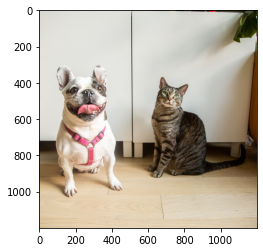

In [5]:
plt.imshow(InputImg)

In [6]:
from torchvision import transforms
transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),               
 transforms.ToTensor(),                   
 transforms.Normalize(                     
 mean=[0.485, 0.456, 0.406],               
 std=[0.229, 0.224, 0.225]                 
 )])

In [7]:
InputImg_t = transform(InputImg)

In [8]:
print(InputImg_t.shape)

torch.Size([3, 224, 224])


In [9]:
import torch
InputImg_bt = torch.unsqueeze(InputImg_t, 0);
print(InputImg_bt.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
from torchvision import models
dir(models)

In [ ]:
#resnet = models.resnet152(pretrained=True)
#resnet.eval()

In [12]:
#output = resnet(InputImg_bt)

In [ ]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

In [18]:
output = alexnet(InputImg_bt)

In [13]:
with open('/content/drive/My Drive/Data/imagenet1000Classes.txt') as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

In [20]:
_, predictedLabels = torch.sort(output, descending=True)
percentage = torch.sigmoid(output)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:5]]


[("281: 'tabby, tabby cat',", 99.99847412109375),
 ("285: 'Egyptian cat',", 99.99625396728516),
 ("174: 'Norwegian elkhound, elkhound',", 99.9950180053711),
 ("245: 'French bulldog',", 99.99334716796875),
 ("254: 'pug, pug-dog',", 99.99272918701172)]